# ３章　可視化の仕組みを構築する１０本ノック

### ノック２１：店舗を絞り込んで可視化できるようにしてみよう

In [1]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv("m_store.csv")
m_area = pd.read_csv("m_area.csv")
order_data = pd.read_csv("tbl_order_202004.csv")
order_data = pd.merge(order_data, m_store, on="store_id", how="left")
order_data = pd.merge(order_data, m_area, on="area_cd", how="left")

# マスターにないコードに対応した文字列を設定
order_data.loc[order_data["takeout_flag"]==0, "takeout_name"] = "デリバリー"
order_data.loc[order_data["takeout_flag"]==1, "takeout_name"] = "お持ち帰り"

order_data.loc[order_data["status"]==0, "status_name"] = "受付"
order_data.loc[order_data["status"]==1, "status_name"] = "お支払済"
order_data.loc[order_data["status"]==2, "status_name"] = "お渡し済"
order_data.loc[order_data["status"]==9, "status_name"] = "キャンセル"

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [ ]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data["store_name"]==val["new"]) & (order_data["status"].isin([1,2]))]
    display(pick_data.head())

store_list = m_store["store_name"].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names="value")
display(dropdown)

Dropdown(index=4, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
52,36078738,90,C86553502,10,400525,2020-04-01 11:04:04,2020-04-01 11:38:04,0,2154,2,綾瀬店,KN,神奈川,神奈川,デリバリー,お渡し済
334,78855579,5,C65163358,6,16886922,2020-04-01 11:28:28,2020-04-01 12:24:28,0,3234,2,綾瀬店,TK,東京,東京,デリバリー,お渡し済
497,10046529,5,C59607850,66,66260562,2020-04-01 11:41:41,2020-04-01 12:19:41,0,2154,2,綾瀬店,TK,東京,東京,デリバリー,お渡し済
510,85289644,90,C29116520,80,96449328,2020-04-01 11:42:42,2020-04-01 12:17:42,1,2603,1,綾瀬店,KN,神奈川,神奈川,お持ち帰り,お支払済
594,91930441,90,C67087674,67,65058129,2020-04-01 11:49:49,2020-04-01 12:13:49,0,2112,2,綾瀬店,KN,神奈川,神奈川,デリバリー,お渡し済


Dropdown(index=2, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

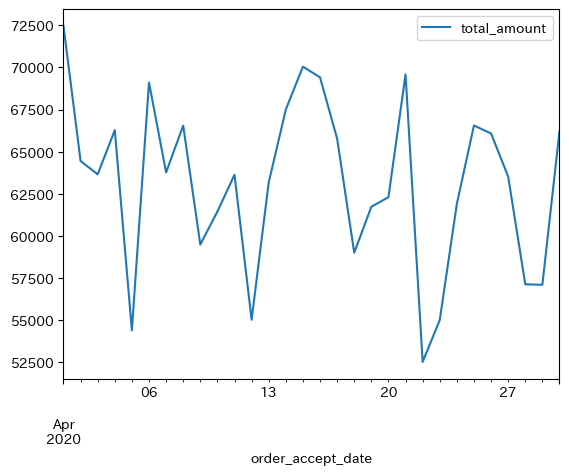

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data["store_name"]==val["new"]) & (order_data["status"].isin([1,2]))]
    temp =pick_data[["order_accept_date", "total_amount"]].copy()
    temp.loc[:,"order_accept_date"] = pd.to_datetime(temp["order_accept_date"])
    temp.set_index("order_accept_date", inplace=True)
    temp.resample("D").sum().plot()

dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names="value")
display(dropdown2)


### ノック２２：複数店舗の詳細を可視化できるようにしてみよう

In [ ]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data["store_name"].isin(val["new"])) & (order_data["status"].isin([1,2]))]
    display(pick_data.head())

select = SelectMultiple(options=store_list)
select.observe (order_by_multi, names="value")
display(select)

SelectMultiple(index=(3,), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店',…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
157,2531743,4,C92443692,67,85022159,2020-04-01 11:13:13,2020-04-01 11:57:13,0,2064,2,北千住店,TK,東京,東京,デリバリー,お渡し済
380,39064833,4,C20047719,76,35781015,2020-04-01 11:32:32,2020-04-01 11:48:32,1,698,1,北千住店,TK,東京,東京,お持ち帰り,お支払済
479,86916169,4,C15610670,79,90260649,2020-04-01 11:39:39,2020-04-01 12:26:39,0,3530,2,北千住店,TK,東京,東京,デリバリー,お渡し済
671,42261602,4,C71523997,15,49883144,2020-04-01 11:56:56,2020-04-01 12:13:56,0,3901,2,北千住店,TK,東京,東京,デリバリー,お渡し済
734,48703173,4,C57515212,99,77446444,2020-04-01 12:02:02,2020-04-01 12:12:02,1,4692,1,北千住店,TK,東京,東京,お持ち帰り,お支払済


SelectMultiple(index=(2,), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店',…

ConversionError: Failed to convert value(s) to axis units: array(['足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店',
       '足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店足立店'],
      dtype=object)

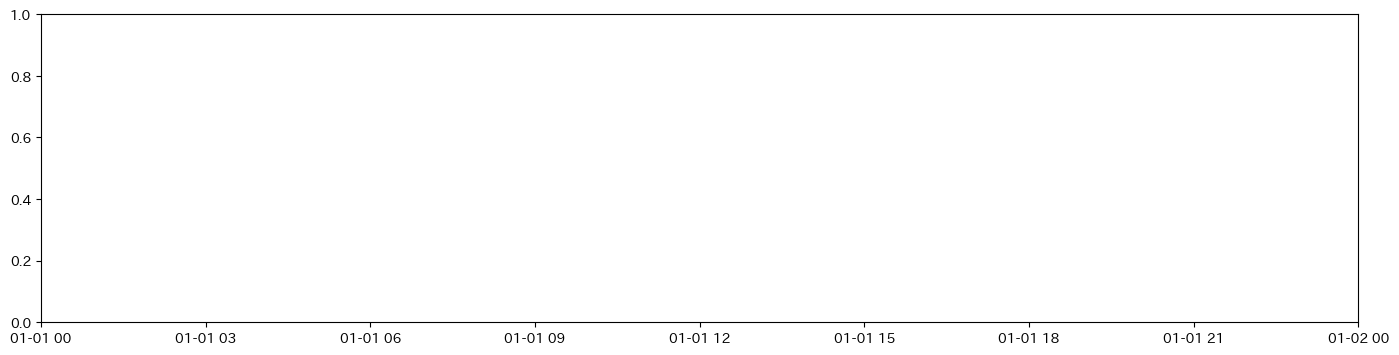

In [ ]:
def graph_by_multi(val):
    clear_output()
    display(select2)

    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    i = 0

    for trg in val["new"]:
      pick_data = order_data.loc[(order_data["store_name"]==trg) & (order_data["status"].isin([1,2]))]
      temp = pick_data[["order_accept_date", "total_amount", "store_name"]].copy()
      temp.loc[:, "order_accept_date"] = pd.to_datetime(temp["order_accept_date"])
      temp.set_index("order_accept_date", inplace=True)
      i += 1
      ax = fig.add_subplot(1, len(val["new"]), i)
      ax.plot(temp.resample("D").sum())
      ax.set_title(trg)

select2 = SelectMultiple(options=store_list)
select2.observe(graph_by_multi, names="value")
display(select2)

### ノック２３：スライドバーを用いてオーダー件数を調べてみよう

### ノック２４：トグルボタンで地域データを抽出しよう

### ノック２５：日付を指定してデータを抽出してみよう

### ノック２６：ストーリーを考えてデータを構築しよう

### ノック２７：キャンセルの理由を分析してみよう

### ノック２８：仮説を検証してみよう

### ノック２９：ストーリーをもとにパーツやデータを組み合わせてダッシュボードを作ろう

### ノック３０：ダッシュボードを改善しよう